https://www.kaggle.com/competitions/energy-anomaly-detection/overview  
Metadata + additional data from https://www.kaggle.com/competitions/ashrae-energy-prediction/data

In [42]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("datasets/energy-anomaly-detection/train.csv")

building_metadata = pd.read_csv("datasets/energy-anomaly-detection/building_metadata.csv")

weather_data = pd.read_csv("datasets/energy-anomaly-detection/weather_train.csv")

In [3]:
data

# Meter readings at taken every hour of every day of the year.

,building_id,timestamp,meter_reading,anomaly
0,1,2016-01-01 00:00:00,NaN,0
1,32,2016-01-01 00:00:00,NaN,0
2,41,2016-01-01 00:00:00,NaN,0
3,55,2016-01-01 00:00:00,NaN,0
4,69,2016-01-01 00:00:00,NaN,0
...,...,...,...,...
1749489,1316,2016-12-31 23:00:00,38.844,0
1749490,1318,2016-12-31 23:00:00,202.893,0
1749491,1319,2016-12-31 23:00:00,NaN,0
1749492,1323,2016-12-31 23:00:00,172.000,0


In [4]:
# Convert timestamp to datetime data type
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [5]:
data.dtypes

building_id               int64
timestamp        datetime64[ns]
meter_reading           float64
anomaly                   int64
dtype: object

In [6]:
# Check missing values
data.isna().sum()

building_id           0
timestamp             0
meter_reading    107653
anomaly               0
dtype: int64

In [7]:
# Check if anomaly is detected where meter reading is NA
data[data['anomaly'] == 1]["meter_reading"].isna().sum()

0

In [8]:
# Remove NA meter readings (Should we consider NA readings? How to fill missing values in this case?)
data = data.dropna(subset = ['meter_reading'])

In [9]:
data.nunique()

building_id         200
timestamp          8784
meter_reading    191681
anomaly               2
dtype: int64

In [10]:
# sort data by building id and timestamp

data = data.sort_values(["building_id", "timestamp"])

In [11]:
data

,building_id,timestamp,meter_reading,anomaly
672179,1,2016-05-20 18:00:00,27.688,0
672379,1,2016-05-20 19:00:00,36.891,0
672579,1,2016-05-20 20:00:00,37.051,0
672779,1,2016-05-20 21:00:00,37.291,0
672979,1,2016-05-20 22:00:00,38.651,0
...,...,...,...,...
1748693,1353,2016-12-31 19:00:00,2.425,0
1748893,1353,2016-12-31 20:00:00,2.450,0
1749093,1353,2016-12-31 21:00:00,2.425,0
1749293,1353,2016-12-31 22:00:00,2.450,0


In [12]:
building_metadata.head(5)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [13]:
weather_data.head(5)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [14]:
data = pd.merge(data, building_metadata, on = "building_id")
data

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count
0,1,2016-05-20 18:00:00,27.688,0,0,Education,2720,2004.0,NaN
1,1,2016-05-20 19:00:00,36.891,0,0,Education,2720,2004.0,NaN
2,1,2016-05-20 20:00:00,37.051,0,0,Education,2720,2004.0,NaN
3,1,2016-05-20 21:00:00,37.291,0,0,Education,2720,2004.0,NaN
4,1,2016-05-20 22:00:00,38.651,0,0,Education,2720,2004.0,NaN
...,...,...,...,...,...,...,...,...,...
1641836,1353,2016-12-31 19:00:00,2.425,0,15,Religious worship,22201,NaN,NaN
1641837,1353,2016-12-31 20:00:00,2.450,0,15,Religious worship,22201,NaN,NaN
1641838,1353,2016-12-31 21:00:00,2.425,0,15,Religious worship,22201,NaN,NaN
1641839,1353,2016-12-31 22:00:00,2.450,0,15,Religious worship,22201,NaN,NaN


In [15]:
# Convert timestamp to datetime data type
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'])

data = pd.merge(data, weather_data, on = ["site_id", "timestamp"], how = "left")

In [16]:
data

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,1,2016-05-20 18:00:00,27.688,0,0,Education,2720,2004.0,NaN,25.0,8.0,18.3,-1.0,1017.9,320.0,10.3
1,1,2016-05-20 19:00:00,36.891,0,0,Education,2720,2004.0,NaN,25.6,NaN,18.9,-1.0,1017.1,340.0,5.7
2,1,2016-05-20 20:00:00,37.051,0,0,Education,2720,2004.0,NaN,28.3,NaN,19.4,0.0,1017.0,30.0,3.6
3,1,2016-05-20 21:00:00,37.291,0,0,Education,2720,2004.0,NaN,30.0,NaN,18.9,0.0,1016.5,70.0,5.1
4,1,2016-05-20 22:00:00,38.651,0,0,Education,2720,2004.0,NaN,27.8,NaN,20.0,0.0,1016.1,100.0,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641836,1353,2016-12-31 19:00:00,2.425,0,15,Religious worship,22201,NaN,NaN,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
1641837,1353,2016-12-31 20:00:00,2.450,0,15,Religious worship,22201,NaN,NaN,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
1641838,1353,2016-12-31 21:00:00,2.425,0,15,Religious worship,22201,NaN,NaN,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
1641839,1353,2016-12-31 22:00:00,2.450,0,15,Religious worship,22201,NaN,NaN,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [17]:
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['weekday'] = data['timestamp'].dt.weekday
data['month'] = data['timestamp'].dt.month

In [18]:
data

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,1,2016-05-20 18:00:00,27.688,0,0,Education,2720,2004.0,NaN,25.0,8.0,18.3,-1.0,1017.9,320.0,10.3,18,20,4,5
1,1,2016-05-20 19:00:00,36.891,0,0,Education,2720,2004.0,NaN,25.6,NaN,18.9,-1.0,1017.1,340.0,5.7,19,20,4,5
2,1,2016-05-20 20:00:00,37.051,0,0,Education,2720,2004.0,NaN,28.3,NaN,19.4,0.0,1017.0,30.0,3.6,20,20,4,5
3,1,2016-05-20 21:00:00,37.291,0,0,Education,2720,2004.0,NaN,30.0,NaN,18.9,0.0,1016.5,70.0,5.1,21,20,4,5
4,1,2016-05-20 22:00:00,38.651,0,0,Education,2720,2004.0,NaN,27.8,NaN,20.0,0.0,1016.1,100.0,5.7,22,20,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641836,1353,2016-12-31 19:00:00,2.425,0,15,Religious worship,22201,NaN,NaN,3.0,NaN,-8.0,NaN,NaN,180.0,5.7,19,31,5,12
1641837,1353,2016-12-31 20:00:00,2.450,0,15,Religious worship,22201,NaN,NaN,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7,20,31,5,12
1641838,1353,2016-12-31 21:00:00,2.425,0,15,Religious worship,22201,NaN,NaN,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1,21,31,5,12
1641839,1353,2016-12-31 22:00:00,2.450,0,15,Religious worship,22201,NaN,NaN,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6,22,31,5,12


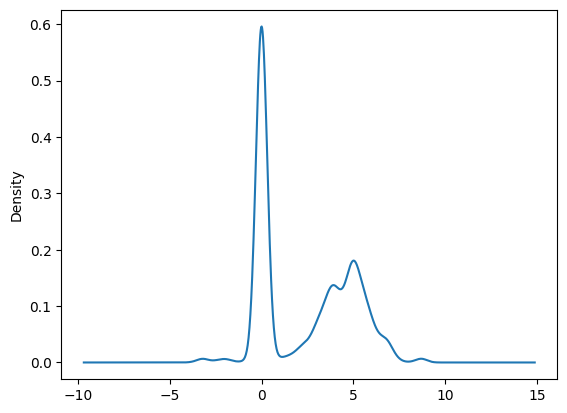

In [19]:
# Some analysis shows that a lot of anomalies are due to meter reading = 1 (log(meter_reading) = 0)

data[data['anomaly'] == 1]['meter_reading'].apply(np.log).plot(kind='kde')
plt.show()

In [20]:
# Add new features, add previous time series data, so comparison can be made to detect anomalies 
# (e.g. huge change in reading between 2 hours or 2 days could be considered anomalous if no valid reason is found)

data["previous_hour_reading"] = data.groupby('building_id')['meter_reading'].shift(1)
data["previous_day_reading"] = data.groupby('building_id')['meter_reading'].shift(24)
data["previous_week_reading"] = data.groupby('building_id')['meter_reading'].shift(24*7)

In [21]:
data

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month,previous_hour_reading,previous_day_reading,previous_week_reading
0,1,2016-05-20 18:00:00,27.688,0,0,Education,2720,2004.0,NaN,25.0,...,1017.9,320.0,10.3,18,20,4,5,NaN,NaN,NaN
1,1,2016-05-20 19:00:00,36.891,0,0,Education,2720,2004.0,NaN,25.6,...,1017.1,340.0,5.7,19,20,4,5,27.688,NaN,NaN
2,1,2016-05-20 20:00:00,37.051,0,0,Education,2720,2004.0,NaN,28.3,...,1017.0,30.0,3.6,20,20,4,5,36.891,NaN,NaN
3,1,2016-05-20 21:00:00,37.291,0,0,Education,2720,2004.0,NaN,30.0,...,1016.5,70.0,5.1,21,20,4,5,37.051,NaN,NaN
4,1,2016-05-20 22:00:00,38.651,0,0,Education,2720,2004.0,NaN,27.8,...,1016.1,100.0,5.7,22,20,4,5,37.291,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641836,1353,2016-12-31 19:00:00,2.425,0,15,Religious worship,22201,NaN,NaN,3.0,...,NaN,180.0,5.7,19,31,5,12,2.600,2.475,11.775
1641837,1353,2016-12-31 20:00:00,2.450,0,15,Religious worship,22201,NaN,NaN,2.8,...,1007.4,180.0,7.7,20,31,5,12,2.425,2.575,11.725
1641838,1353,2016-12-31 21:00:00,2.425,0,15,Religious worship,22201,NaN,NaN,2.8,...,1007.5,180.0,5.1,21,31,5,12,2.450,2.475,7.225
1641839,1353,2016-12-31 22:00:00,2.450,0,15,Religious worship,22201,NaN,NaN,2.2,...,1008.0,170.0,4.6,22,31,5,12,2.425,2.450,2.425


In [22]:
# In same manner can also consider future time series (ideally not possible in real usecases)

data["next_hour_reading"] = data.groupby('building_id')['meter_reading'].shift(-1)
data["next_day_reading"] = data.groupby('building_id')['meter_reading'].shift(-24)
data["next_week_reading"] = data.groupby('building_id')['meter_reading'].shift(-24*7)

In [23]:
data

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,hour,day,weekday,month,previous_hour_reading,previous_day_reading,previous_week_reading,next_hour_reading,next_day_reading,next_week_reading
0,1,2016-05-20 18:00:00,27.688,0,0,Education,2720,2004.0,NaN,25.0,...,18,20,4,5,NaN,NaN,NaN,36.891,37.691,39.692
1,1,2016-05-20 19:00:00,36.891,0,0,Education,2720,2004.0,NaN,25.6,...,19,20,4,5,27.688,NaN,NaN,37.051,37.451,38.891
2,1,2016-05-20 20:00:00,37.051,0,0,Education,2720,2004.0,NaN,28.3,...,20,20,4,5,36.891,NaN,NaN,37.291,36.171,39.772
3,1,2016-05-20 21:00:00,37.291,0,0,Education,2720,2004.0,NaN,30.0,...,21,20,4,5,37.051,NaN,NaN,38.651,37.691,39.212
4,1,2016-05-20 22:00:00,38.651,0,0,Education,2720,2004.0,NaN,27.8,...,22,20,4,5,37.291,NaN,NaN,38.971,38.651,38.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641836,1353,2016-12-31 19:00:00,2.425,0,15,Religious worship,22201,NaN,NaN,3.0,...,19,31,5,12,2.600,2.475,11.775,2.450,NaN,NaN
1641837,1353,2016-12-31 20:00:00,2.450,0,15,Religious worship,22201,NaN,NaN,2.8,...,20,31,5,12,2.425,2.575,11.725,2.425,NaN,NaN
1641838,1353,2016-12-31 21:00:00,2.425,0,15,Religious worship,22201,NaN,NaN,2.8,...,21,31,5,12,2.450,2.475,7.225,2.450,NaN,NaN
1641839,1353,2016-12-31 22:00:00,2.450,0,15,Religious worship,22201,NaN,NaN,2.2,...,22,31,5,12,2.425,2.450,2.425,2.400,NaN,NaN


In [25]:
# Include rolling measurement of the temperature around the site (temperature would include consumption of electricity.)

rolling_df = data.groupby('site_id')['air_temperature'].rolling(window=3, min_periods=0, center=True)
data['air_temperature_mean'] = rolling_df.mean().reset_index(level=0, drop=True)
data['air_temperature_max'] = rolling_df.max().reset_index(level=0, drop=True)
data['air_temperature_min'] = rolling_df.min().reset_index(level=0, drop=True)
data['air_temperature_std'] = rolling_df.std().reset_index(level=0, drop=True)

In [26]:
data

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,previous_hour_reading,previous_day_reading,previous_week_reading,next_hour_reading,next_day_reading,next_week_reading,air_temperature_mean,air_temperature_max,air_temperature_min,air_temperature_std
0,1,2016-05-20 18:00:00,27.688,0,0,Education,2720,2004.0,NaN,25.0,...,NaN,NaN,NaN,36.891,37.691,39.692,25.300000,25.6,25.0,0.424264
1,1,2016-05-20 19:00:00,36.891,0,0,Education,2720,2004.0,NaN,25.6,...,27.688,NaN,NaN,37.051,37.451,38.891,26.300000,28.3,25.0,1.757840
2,1,2016-05-20 20:00:00,37.051,0,0,Education,2720,2004.0,NaN,28.3,...,36.891,NaN,NaN,37.291,36.171,39.772,27.966667,30.0,25.6,2.218859
3,1,2016-05-20 21:00:00,37.291,0,0,Education,2720,2004.0,NaN,30.0,...,37.051,NaN,NaN,38.651,37.691,39.212,28.700000,30.0,27.8,1.153256
4,1,2016-05-20 22:00:00,38.651,0,0,Education,2720,2004.0,NaN,27.8,...,37.291,NaN,NaN,38.971,38.651,38.411,28.333333,30.0,27.2,1.474223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641836,1353,2016-12-31 19:00:00,2.425,0,15,Religious worship,22201,NaN,NaN,3.0,...,2.600,2.475,11.775,2.450,NaN,NaN,2.866667,3.0,2.8,0.115470
1641837,1353,2016-12-31 20:00:00,2.450,0,15,Religious worship,22201,NaN,NaN,2.8,...,2.425,2.575,11.725,2.425,NaN,NaN,2.866667,3.0,2.8,0.115470
1641838,1353,2016-12-31 21:00:00,2.425,0,15,Religious worship,22201,NaN,NaN,2.8,...,2.450,2.475,7.225,2.450,NaN,NaN,2.600000,2.8,2.2,0.346410
1641839,1353,2016-12-31 22:00:00,2.450,0,15,Religious worship,22201,NaN,NaN,2.2,...,2.425,2.450,2.425,2.400,NaN,NaN,2.233333,2.8,1.7,0.550757


In [ ]:
# What to consider for NaN readings?

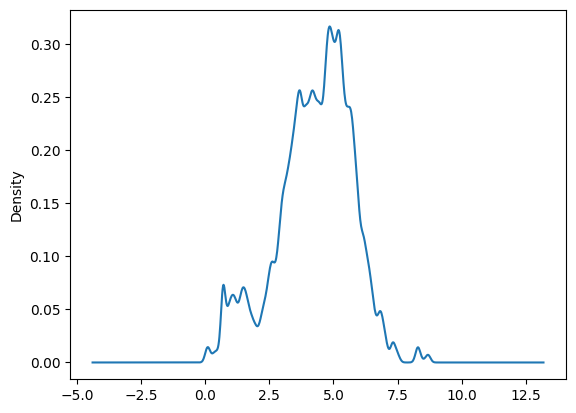

In [28]:
# Apply log1p transformation on meter reading makes a normal-ish distribution
data['log1p_meter_reading'] = np.log1p(data['meter_reading'])

data['log1p_meter_reading'].plot(kind='kde')
plt.show()

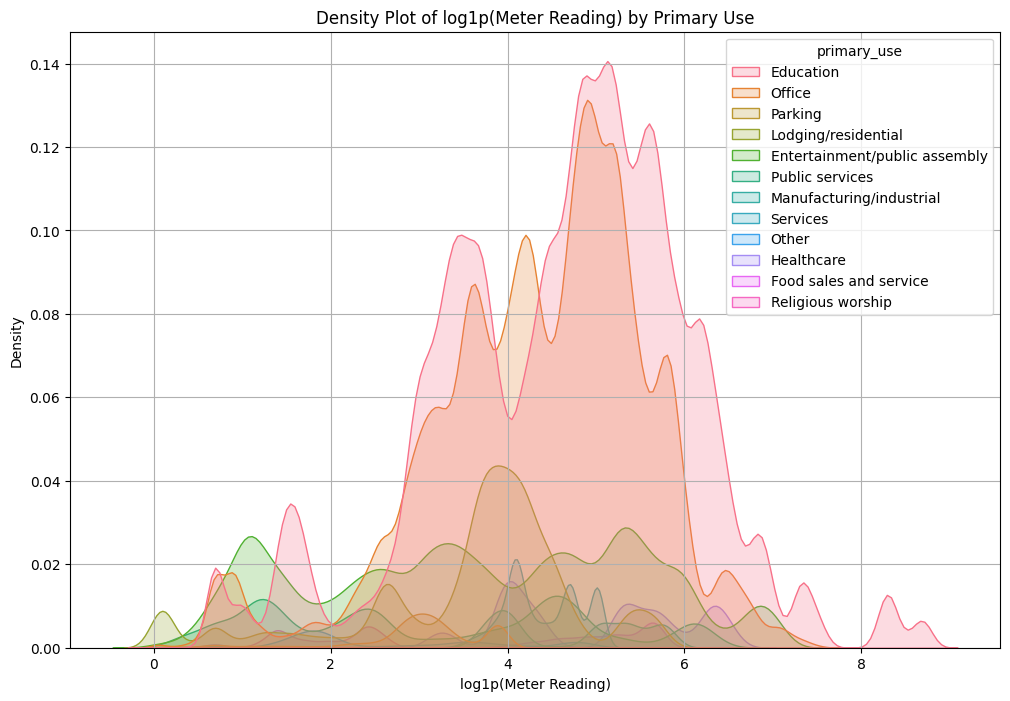

In [48]:
# Readings are normal for Education, Office, Parking, Residential areas, more unreliable for other areas.
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, x='log1p_meter_reading', hue='primary_use', fill=True)
plt.xlabel('log1p(Meter Reading)')
plt.ylabel('Density')
plt.title('Density Plot of log1p(Meter Reading) by Primary Use')
plt.grid(True)
plt.show()

In [49]:
# Standardize readings per square feet

data['reading_per_sq_feet'] = np.divide(data['meter_reading'], data['square_feet'])

In [50]:
data

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,previous_week_reading,next_hour_reading,next_day_reading,next_week_reading,air_temperature_mean,air_temperature_max,air_temperature_min,air_temperature_std,log1p_meter_reading,reading_per_sq_feet
0,1,2016-05-20 18:00:00,27.688,0,0,Education,2720,2004.0,NaN,25.0,...,NaN,36.891,37.691,39.692,25.300000,25.6,25.0,0.424264,3.356479,0.010179
1,1,2016-05-20 19:00:00,36.891,0,0,Education,2720,2004.0,NaN,25.6,...,NaN,37.051,37.451,38.891,26.300000,28.3,25.0,1.757840,3.634714,0.013563
2,1,2016-05-20 20:00:00,37.051,0,0,Education,2720,2004.0,NaN,28.3,...,NaN,37.291,36.171,39.772,27.966667,30.0,25.6,2.218859,3.638927,0.013622
3,1,2016-05-20 21:00:00,37.291,0,0,Education,2720,2004.0,NaN,30.0,...,NaN,38.651,37.691,39.212,28.700000,30.0,27.8,1.153256,3.645215,0.013710
4,1,2016-05-20 22:00:00,38.651,0,0,Education,2720,2004.0,NaN,27.8,...,NaN,38.971,38.651,38.411,28.333333,30.0,27.2,1.474223,3.680116,0.014210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641836,1353,2016-12-31 19:00:00,2.425,0,15,Religious worship,22201,NaN,NaN,3.0,...,11.775,2.450,NaN,NaN,2.866667,3.0,2.8,0.115470,1.231101,0.000109
1641837,1353,2016-12-31 20:00:00,2.450,0,15,Religious worship,22201,NaN,NaN,2.8,...,11.725,2.425,NaN,NaN,2.866667,3.0,2.8,0.115470,1.238374,0.000110
1641838,1353,2016-12-31 21:00:00,2.425,0,15,Religious worship,22201,NaN,NaN,2.8,...,7.225,2.450,NaN,NaN,2.600000,2.8,2.2,0.346410,1.231101,0.000109
1641839,1353,2016-12-31 22:00:00,2.450,0,15,Religious worship,22201,NaN,NaN,2.2,...,2.425,2.400,NaN,NaN,2.233333,2.8,1.7,0.550757,1.238374,0.000110
